<a href="https://colab.research.google.com/github/aruntakhur/DeepLearning_Aut_2020_IIITDWD/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#https://blog.keras.io/building-autoencoders-in-keras.html
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder1 = keras.Model(input_img, encoded)



In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder1 = keras.Model(encoded_input, decoder_layer(encoded_input))


In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)



11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


In [7]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder1.predict(x_test)
decoded_imgs = decoder1.predict(encoded_imgs)


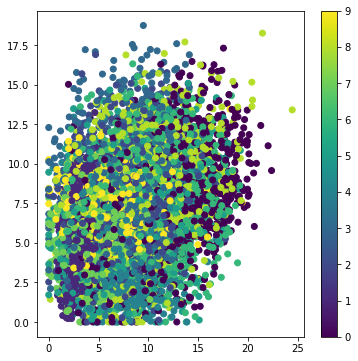

In [10]:
import matplotlib.pyplot as plt
x_test_encoded = encoder1.predict(x_test, batch_size=256)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

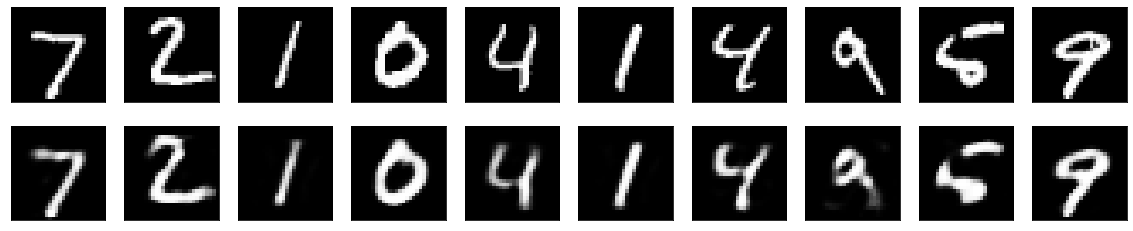

In [11]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#**Deep Autoencoder** 

In [13]:
import keras
from keras import layers
input_img = keras.Input(shape=(784,))
x = layers.Dense(128, activation='relu')(input_img)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
encoded = layers.Dense(2, activation='relu')(x)

x = layers.Dense(16, activation='relu')(encoded)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
decoded = layers.Dense(784, activation='sigmoid')(x)


In [14]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2820 - val_loss: 0.2500
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2449 - val_loss: 0.2266
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2176 - val_loss: 0.2097
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2068 - val_loss: 0.2038
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2014 - val_loss: 0.1993
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1973 - val_loss: 0.1947
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1938 - val_loss: 0.1924
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1913 - val_loss: 0.1898
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1889 - val_loss: 0.1875
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1865 - val_lo

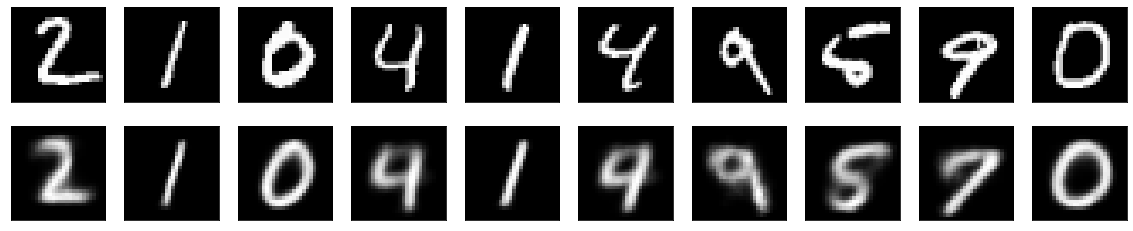

In [15]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
encoder2 = keras.Model(input_img, encoded)
x_test_encoded2 = encoder2.predict(x_test)

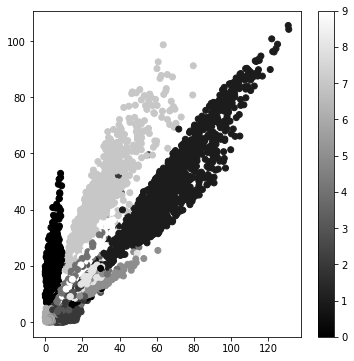

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded2[:, 0], x_test_encoded2[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [38]:
encoded_input = keras.Input(shape=(2,))
decoder_layer5 = autoencoder.layers[-5](encoded_input)
decoder_layer4 = autoencoder.layers[-4](decoder_layer5)
decoder_layer3 = autoencoder.layers[-3](decoder_layer4)
decoder_layer2 = autoencoder.layers[-2](decoder_layer3)
decoder_layer1 = autoencoder.layers[-1](decoder_layer2)
decoder2 = keras.Model(encoded_input, decoder_layer1)

In [39]:
decoded_imgs2 = decoder2.predict(x_test_encoded2)

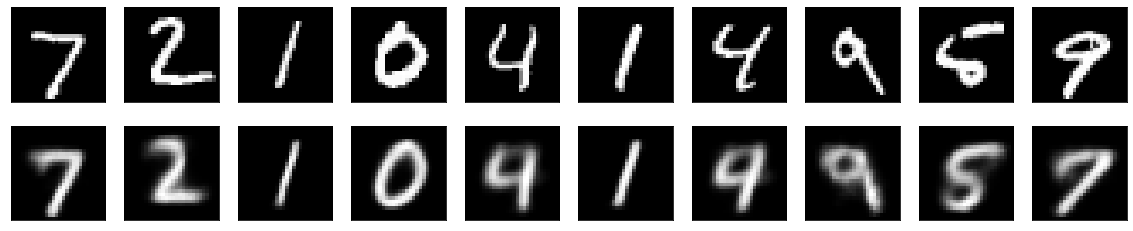

In [40]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
